# Demo of Ch1. Introduction
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

### Import Packages
----
- `numpy`: Provide linear algebra related computation ability
- `sklearn`: Scikit-Learn, provides basic data analysis and machine learning methods functionality
- `matplotlib`: Provide the functionality of plotting figures, e.g., Histogram, Scatter ., etc.
- `keras.datasets`: Provides common dataset for machine learning playground 

In [1]:
import numpy as np

import sklearn.model_selection
import sklearn.metrics
import sklearn.svm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.datasets import mnist
from keras.datasets import fashion_mnist

%matplotlib inline

Using TensorFlow backend.


### Load MNIST Dataset
----
The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

For more information, see: http://yann.lecun.com/exdb/mnist/

Now We'll demo the basic array manipulation of Numpy. Please be aware of the following naming convention:
- `I`: Used to denotes the original MNIST image **sets**, the dimension should be `(N, 28, 28)`
- `i`: Used to denotes the **single** original MNIST image, the dimension should be `(28, 28)`
- `X`: Used to denotes the vectorized result of MNIST image **sets**, the dimension should be `(N, 784)`, where `784 = 28*28`
- `x`: Used to denotes the **single** original MNIST image, the dimension should be `(784)`

Here's the basic information of MNIST training set:
- Use `I_train.shape` to dump the shape of the MNIST dataset
- Use `numpy.unique` to dump all of possible lables for MNIST dataset

Shape of `I_train`:
(60000, 28, 28)
Labels appeared in `y_train`:
[0 1 2 3 4 5 6 7 8 9]


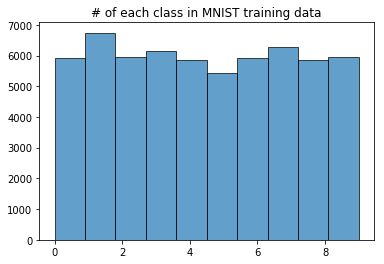

In [2]:
(I_train, y_train), (I_test, y_test) = mnist.load_data()

I_train = np.array(I_train) / 255.0
y_train = np.array(y_train)

I_test = np.array(I_test) / 255.0
y_test = np.array(y_test)

print("Shape of `I_train`:")
print(I_train.shape)

print("Labels appeared in `y_train`:")
print(np.unique(y_train))

plt.hist(y_train, bins=10, edgecolor="black", alpha=0.7)
plt.title("# of each class in MNIST training data")
plt.show()

## 1.2. Data Preparation

### Demo 1.2.1. Show Original Images
----
- Print the first 20 images in MNIST first
- Show the vectorized result of label `0`, `1`, and `2`

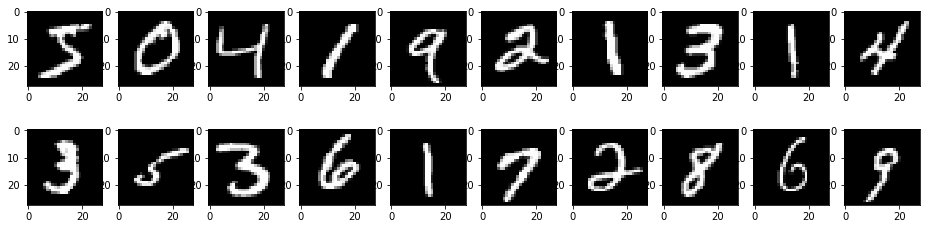

In [3]:
plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(I_train[i,:], cmap='gray')

### Demo 1.2.2. Vectorize Original `28 x 28` Images
----
The original data shape of X_train is `(60000, 28, 28)`, which denotes that there are 60000 images in dimension of `28 x 28`.

To make all images vectorized, using `numpy.reshape`, convert it into shape `(60000, 784)`.

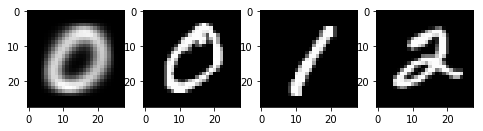

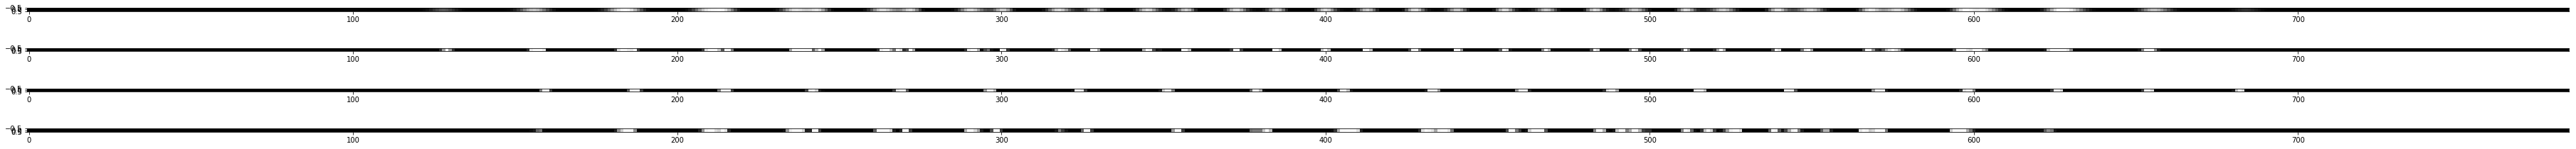

In [4]:
# Create a pseudo base image i0 by simply computing the average of all 0-images
i0 = np.average(I_train[y_train == 0, :, :], axis=0)

# Vectorize basis image i0 to shape (784) as w0:
w0 = i0.reshape((1, 784))

# Vectorize pseudo unknown image to shape (784) for the first image of class label == 0, 1, and 2
X_train = I_train.reshape(60000, 784)
X_train0 = X_train[y_train == 0, :]
X_train1 = X_train[y_train == 1, :]
X_train2 = X_train[y_train == 2, :]


# Show the original result
plt.figure(figsize=(8, 2))
plt.subplot(1, 4, 1)
plt.imshow(w0.reshape(28, 28), cmap='gray')

plt.subplot(1, 4, 2)
plt.imshow(X_train0[0,:].reshape(28, 28), cmap='gray')

plt.subplot(1, 4, 3)
plt.imshow(X_train1[0,:].reshape(28, 28), cmap='gray')

plt.subplot(1, 4, 4)
plt.imshow(X_train2[0,:].reshape(28, 28), cmap='gray')


# Show vectorized result
plt.figure(figsize=(64, 4))
plt.subplot(4, 1, 1)
plt.imshow(w0, cmap='gray')

plt.subplot(4, 1, 2)
plt.imshow(X_train0[0,:].reshape(1, 784), cmap='gray')

plt.subplot(4, 1, 3)
plt.imshow(X_train1[0,:].reshape(1, 784), cmap='gray')

plt.subplot(4, 1, 4)
plt.imshow(X_train2[0,:].reshape(1, 784), cmap='gray')

## 1.3. Mathematics Review: Linear Algebra - Part.1

### Demo 1.3.1. Measure the Similarities by Vector Inner-product
----
This demo shows how to measure the similarity between 2 vectors.

Here we use $\mathbf{w}_{0}$, which is a "0"-image converted from varaiable `i0` as a pseudo-basis vector, and we select following 3 images as pseudo-unknown data:
- `X_train0[0, :]`, a "0"-image" as a vector $\mathbf{x}_0$ (variable `x0_0` used below)
- `X_train1[0, :]`, a "1"-image" as a vector $\mathbf{x}_1$ (variable `x1_0` used below)
- `X_train2[0, :]`, a "2"-image" as a vector $\mathbf{x}_2$ (variable `x2_0` used below)

To compute the similarties between $\mathbf{w}_{0}$ and each vectorized digit images $\mathbf{x}_0$, $\mathbf{x}_1$ and $\mathbf{x}_2$:
1. Normalize the vector to unit-length first by `np.linalg.norm`
2. Then compute the following inner-product values by `numpy.inner()`:
    - $\mathbf{w}_{0}^T\mathbf{x}_0$
    - $\mathbf{w}_{0}^T\mathbf{x}_1$
    - $\mathbf{w}_{0}^T\mathbf{x}_2$

In [5]:
# Normalize
w0 = w0 / np.linalg.norm(w0)
x0_0 = X_train0[0, :] /  np.linalg.norm(X_train0[0, :])
x1_0 = X_train1[0, :] /  np.linalg.norm(X_train1[0, :])
x2_0 = X_train2[0, :] /  np.linalg.norm(X_train2[0, :])


# Compute the inner products
w0_t_x0_0 = np.inner(w0, x0_0)
print (w0_t_x0_0)

w0_t_x1_0 = np.inner(w0, x1_0)
print (w0_t_x1_0)

w0_t_x2_0 = np.inner(w0, x2_0)
print (w0_t_x2_0)


[0.85727992]
[0.33562785]
[0.58880926]


## 1.4. Performance Evaluation

### Demo 1.4.1 Training Set, Validation Set, and Testing Set Separation - Using IRIS dataset
----
The demo here shows how to divide the collected labled-data into training set and validation set.
- `sklearn.model_selection.train_test_split` separate data into 0.2 validation set and 0.8 training set
- `sklearn.model_selection.cross_val_score` conduct the 5-fold cross-validation with linear SVM

# Training set: 120
# Testing set: 30


D:\Github\tu-etp-ad1062\mlfund\plot.py:90: UserWarning: Dimension of samples exceeds 2, only plot the first-2 dimension
  warnings.warn("Dimension of samples exceeds 2, only plot the first-2 dimension")


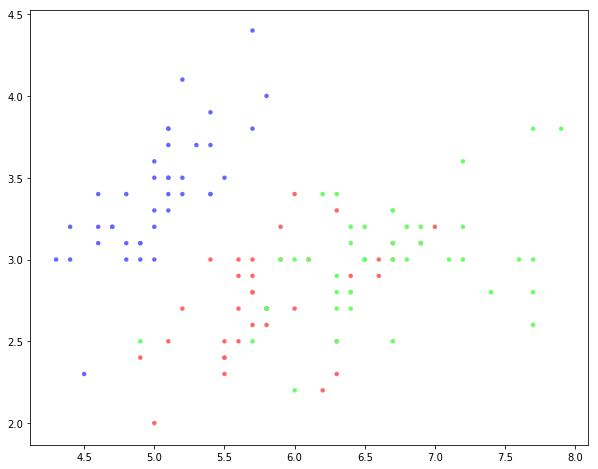

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from mlfund.plot import Plot2D
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(
    load_iris().data,   # Data (X)
    load_iris().target, # Label (y)
    test_size=0.2,      # Ratio of testing data
    random_state=0      # Random separated or not
)

print("# Training set: %d" % len(y_train))
print("# Testing set: %d" % len(y_test))

plot = Plot2D()
plot.scatter(X_train, y_train)

In [7]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)

scores = sklearn.metrics.zero_one_loss(y_test, y_test_predict)
print("Result of train_test_split:")
print("  Original label of X_test: %s" % y_test)
print("  Predicted label of X_test: %s" % y_test_predict)
print("  0-1 loss: %s" % scores)

Result of train_test_split:
  Original label of X_test: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
  Predicted label of X_test: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
  0-1 loss: 0.0


In [8]:
scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5)
print("Result of 5-fold cross validation:")
print("  %s" % scores)

Result of 5-fold cross validation:
  [0.96       0.92       1.         0.95833333 0.95454545]


### Demo 1.4.2. Mean Consequential Error (MCE)
----
The demo shows how to compute mean consequential error value with the 10-class toy sample on the slides.

In [9]:
y_ground_truth = np.array([3, 5, 2, 1])
y_predict = np.array([3, 5, 3, 1])

err_mce = sklearn.metrics.zero_one_loss(y_ground_truth, y_predict)

print("MCE = %2.3f" % err_mce)

MCE = 0.250


### Demo 1.4.3. LogLoss (2-class)
---
The demo shows how to compute logLoss value with the 2-class toy sample on the slides.

**Notice:** Due to logLoss requires the proability that sample belongs to each class, a categorical array input is required.

In [10]:
y_ground_truth = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])
y_predict = np.array([[0, 1], [1, 0], [0.1, 0.9], [0.4, 0.6]])

err_log_loss = sklearn.metrics.log_loss(y_ground_truth, y_predict)

print("LogLoss value = %2.3f" % err_log_loss)

LogLoss value = 0.703


### Demo 1.4.4. LogLoss (K-class)
----
The demo shows how to compute logLoss value with the 10-class toy sample on the slides.

**Notice:** Due to logLoss requires the proability that sample belongs to each class, a categorical array input is required.

In [11]:
y_ground_truth = np.array([[0,0,0,1,0,0,0,0,0,0], [0,0,0,0,0,1,0,0,0,0], [0,0,1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0,0,0]])
y_predict = np.array([[0,0.1,0,0.9,0,0,0,0,0,0], [0,0,0,0,0,1,0,0,0,0], [0,0.8,0.1,0,0,0,0,0,0,0.1], [0,0.9,0,0,0,0,0.1,0,0,0]])

err_log_loss = sklearn.metrics.log_loss(y_ground_truth, y_predict)

print("LogLoss value = %2.3f" % err_log_loss)

LogLoss value = 0.628
